## Imports and Reading in DF

In [5]:
from statsmodels.stats.proportion import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
sns.set(rc={'figure.figsize':(22,16)})

df = pd.read_csv("SP500.csv")
df = df[df["Date"] > "1969"]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1969-01-02,103.860001,104.849998,103.209999,103.930000,103.930000,9800000
1,1969-01-03,103.930000,104.870003,103.169998,103.989998,103.989998,12750000
2,1969-01-06,103.989998,104.360001,101.940002,102.470001,102.470001,12720000
3,1969-01-07,102.470001,102.680000,100.150002,101.220001,101.220001,15740000
4,1969-01-08,101.220001,102.120003,100.139999,100.800003,100.800003,13840000


In [6]:
df["Return"] = (df["Close"] - df["Open"]) / df["Open"]
df["nextReturn"] = df["Return"].shift(-1)

## Distribution of Returns

(0, 0.18)

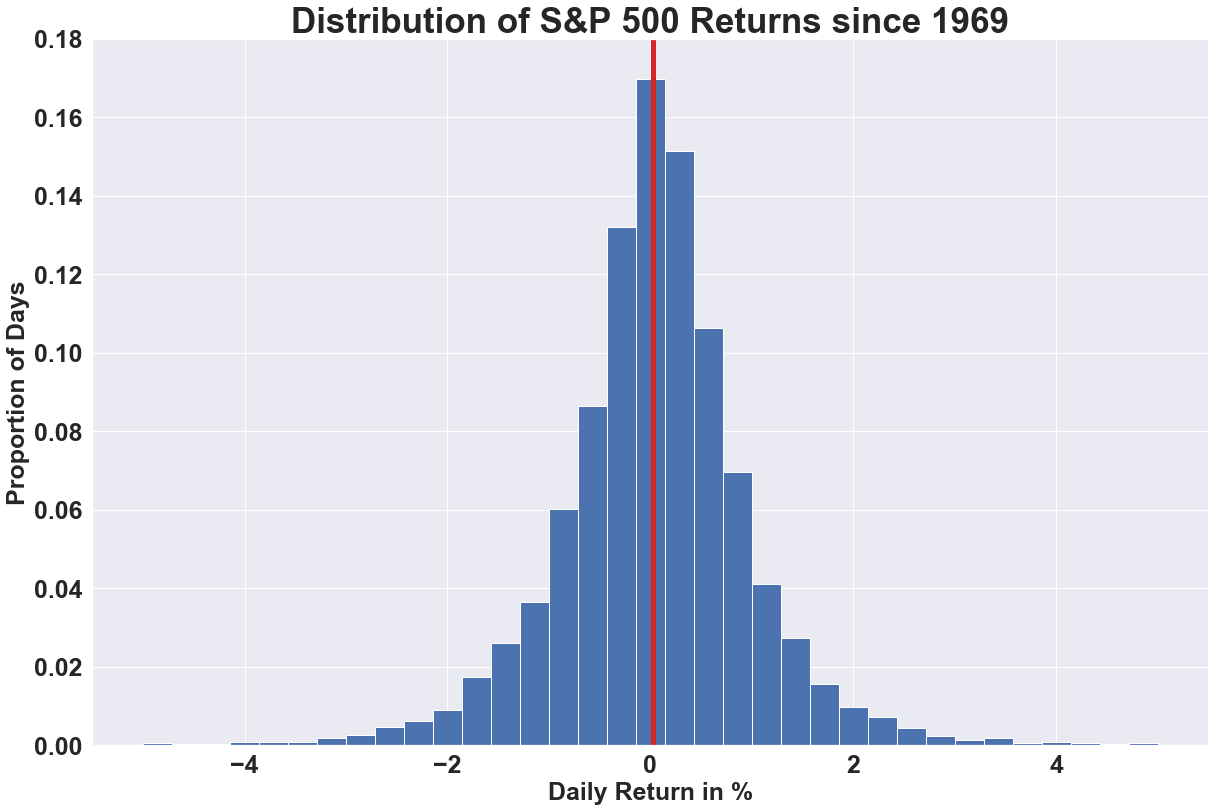

In [13]:
sns.set(rc={'figure.figsize':(20,13)})
weights = np.ones_like(100*df["Return"]) / len(100*df["Return"])
plt.hist(100*df["Return"], weights=weights, range=[-5, 5], bins=35)
plt.vlines(.03, 0, .2, linewidth=5, color='tab:red')
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel("Daily Return in %", fontsize=25, fontweight='bold')
plt.ylabel("Proportion of Days", fontsize=25, fontweight='bold')
plt.title("Distribution of S&P 500 Returns since 1969", fontsize=35, fontweight='bold')
plt.yticks()[1]
plt.ylim(0, .18)

## Confidence Interval Plot

In [7]:
def get_next_day_negative(num):
    p_days = df[df["Return"] < num]["nextReturn"] > 0
    l, u = proportion_confint(p_days.sum(), len(p_days), alpha=.05, method="normal")
    return (p_days.mean(), l, u)

def get_next_day_positive(num):
    p_days = df[df["Return"] > num]["nextReturn"] > 0
    l, u = proportion_confint(p_days.sum(), len(p_days), alpha=.05, method="normal")
    return (p_days.mean(), l, u)

Text(0.5, 1.0, 'Percent of Positive Days after a Return < x%')

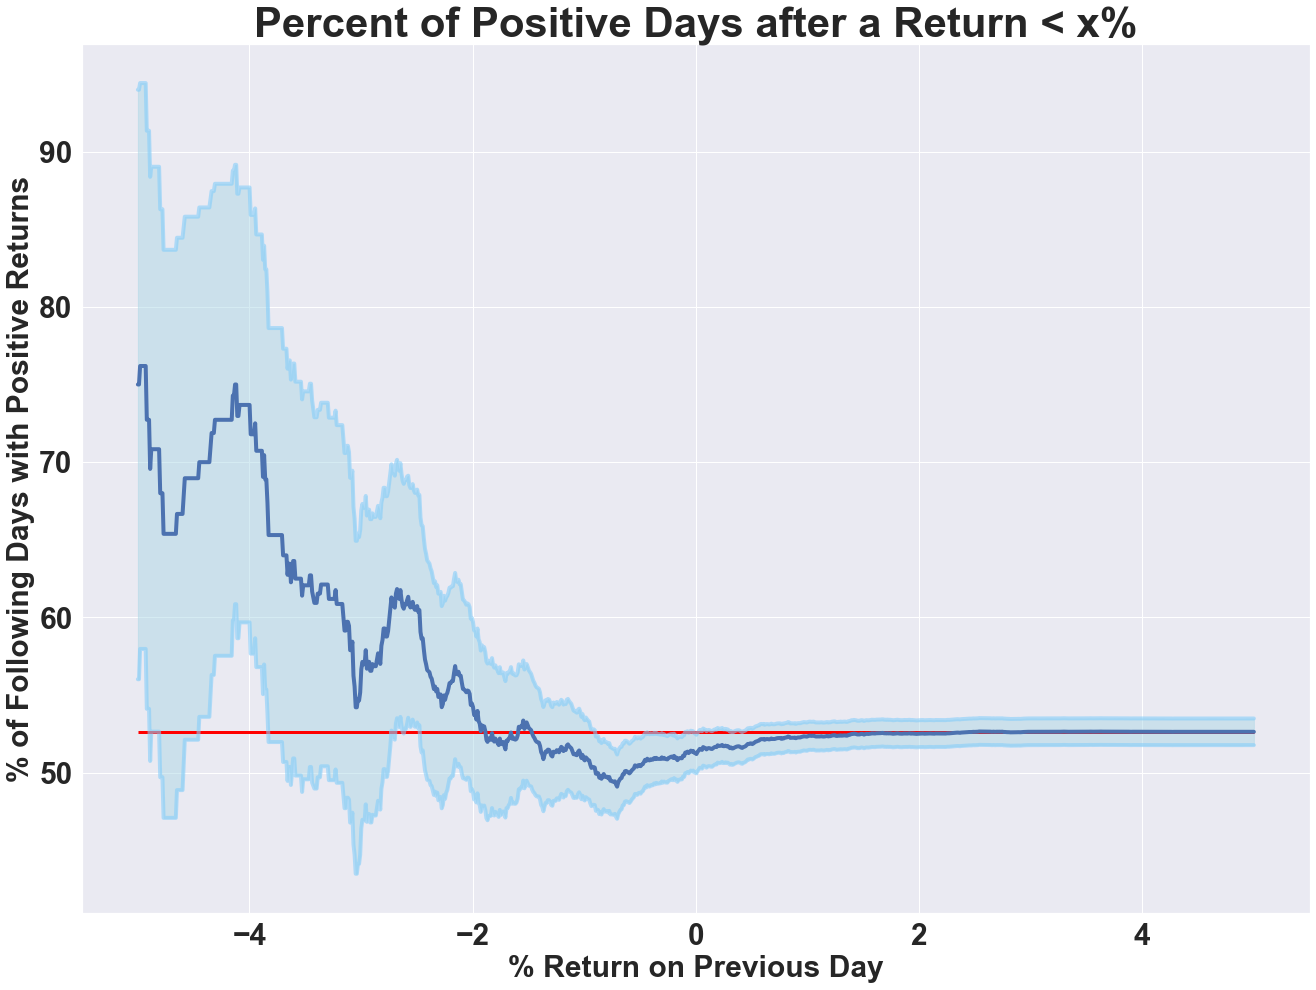

In [11]:
xs = np.linspace(-.05, .05, 1000)
ys = pd.DataFrame([get_next_day_negative(x) for x in xs])

fig, ax = plt.subplots()
plt.plot(100*xs, 100*np.array(ys[0]), linewidth=4)
plt.plot(100*xs, 100*np.array(ys[[1, 2]]), linewidth=4, color="lightskyblue", alpha=.6)
ax.fill_between(100*np.array(xs), 100*np.array(ys[0]), 100*np.array(ys[1]), color="lightblue", alpha=.5)
ax.fill_between(100*np.array(xs), 100*np.array(ys[0]), 100*np.array(ys[2]), color="lightblue", alpha=.5)
plt.hlines(y=52.61988, xmin=-5, xmax=5, color="red", linewidth=3)
plt.xlabel("% Return on Previous Day", fontsize=30, fontweight="bold")
plt.ylabel("% of Following Days with Positive Returns", fontsize=30, fontweight="bold")
plt.yticks(fontsize=30, fontweight="bold")
plt.xticks(fontsize=30, fontweight="bold")
plt.title("Percent of Positive Days after a Return < x%", fontsize=42, fontweight="bold")

Text(0.5, 1.0, 'Percent of Positive Days after a Return > x%')

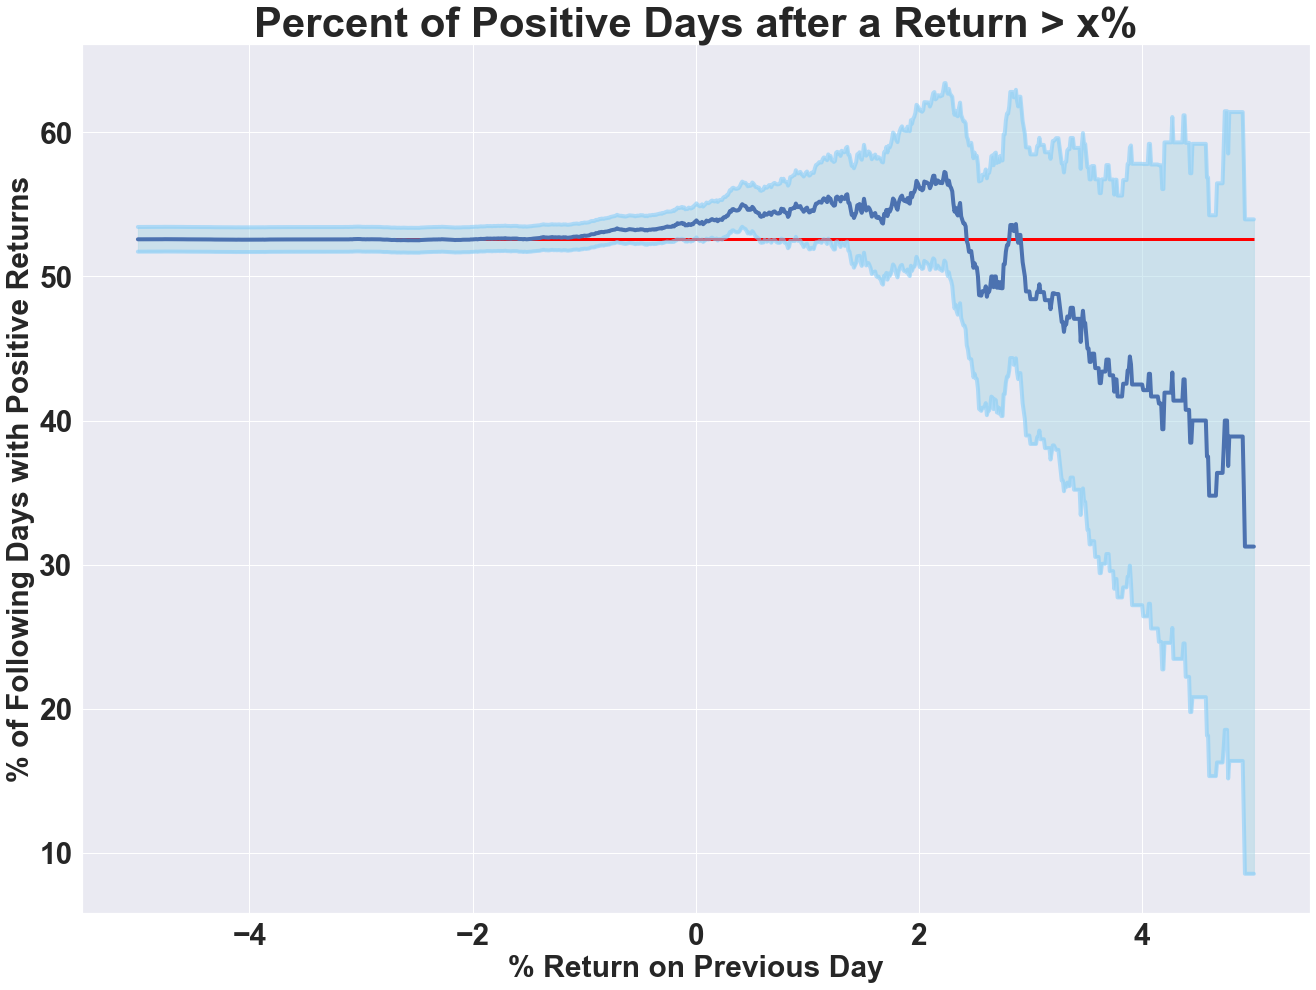

In [10]:
xs = np.linspace(-.05, .05, 1000)
ys = pd.DataFrame([get_next_day_positive(x) for x in xs])

fig, ax = plt.subplots()
plt.plot(100*xs, 100*np.array(ys[0]), linewidth=4)
plt.plot(100*xs, 100*np.array(ys[[1, 2]]), linewidth=4, color="lightskyblue", alpha=.6)
ax.fill_between(100*np.array(xs), 100*np.array(ys[0]), 100*np.array(ys[1]), color="lightblue", alpha=.5)
ax.fill_between(100*np.array(xs), 100*np.array(ys[0]), 100*np.array(ys[2]), color="lightblue", alpha=.5)
plt.hlines(y=52.61988, xmin=-5, xmax=5, color="red", linewidth=3)
plt.xlabel("% Return on Previous Day", fontsize=30, fontweight="bold")
plt.ylabel("% of Following Days with Positive Returns", fontsize=30, fontweight="bold")
plt.yticks(fontsize=30, fontweight="bold")
plt.xticks(fontsize=30, fontweight="bold")
plt.title("Percent of Positive Days after a Return > x%", fontsize=42, fontweight="bold")